In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_toolkits.mplot3d import Axes3D
import datetime
from IPython.display import HTML
from PIL import Image
from IPython.display import display, clear_output
from functions import SMA, Trend
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import FloatRangeSlider

# USD/RUB

## Распределение размерности по годам

In [3]:
analys = pd.read_excel('data/Результат_Закрытие_RUB.xlsx')
analys['Год'] = analys['Дата'].dt.year

In [4]:
analys

,Дата,Закрытие,Объем,Изменение,Разм_Хёрст,Разм_BC,Размах,Тренд,Неделя,Год
0,2018-01-01,57.7687,490,NaN,1.46,1.17,1.5449,-0.000622,1,2018
1,2018-01-02,57.4143,90256,-0.613481,1.46,1.17,1.5449,-0.000622,1,2018
2,2018-01-03,57.1928,106610,-0.385792,1.46,1.17,1.5449,-0.000622,1,2018
3,2018-01-04,56.9313,116615,-0.457225,1.46,1.17,1.5449,-0.000622,1,2018
4,2018-01-05,56.9288,107617,-0.004391,1.46,1.17,1.5449,-0.000622,1,2018
...,...,...,...,...,...,...,...,...,...,...
1633,2022-12-26,68.3300,631,0.485294,1.47,1.35,7.1000,0.009121,52,2022
1634,2022-12-27,69.0000,220,0.980536,1.47,1.35,7.1000,0.009121,52,2022
1635,2022-12-28,71.7500,340,3.985507,1.47,1.35,7.1000,0.009121,52,2022
1636,2022-12-29,73.0000,514,1.742160,1.47,1.35,7.1000,0.009121,52,2022


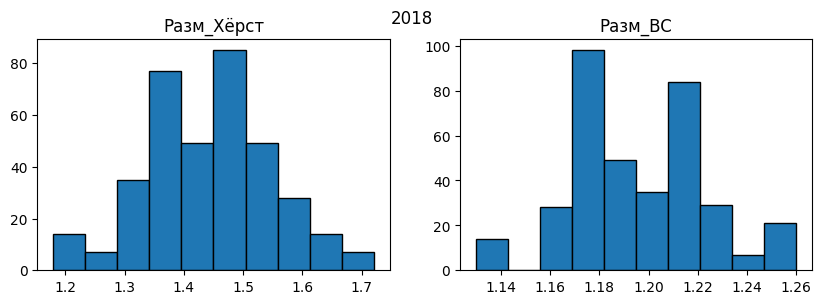

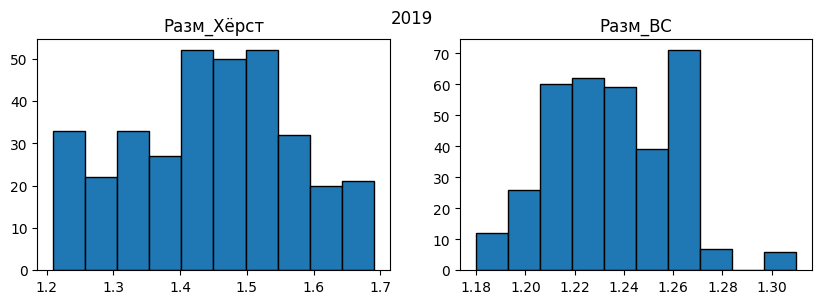

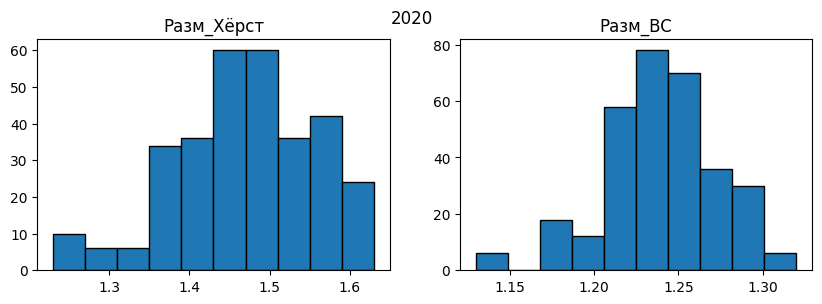

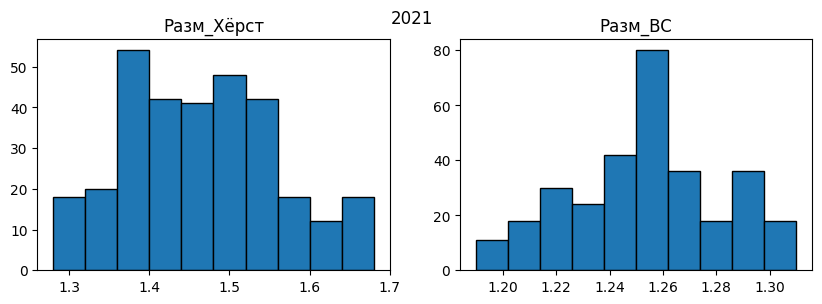

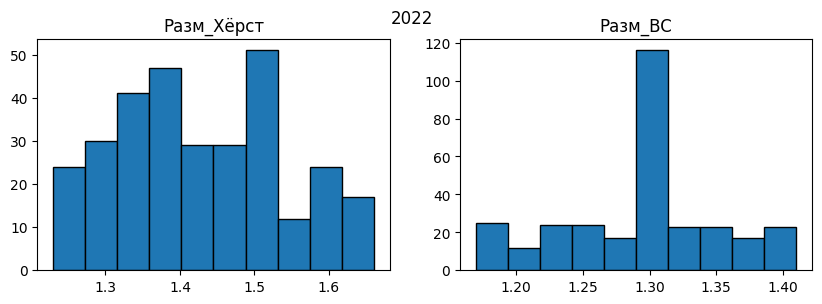

In [5]:
for year in analys['Год'].unique():
    window = analys.loc[analys['Год']==year]
    # Гистограмма распределения размерностей
    fig = plt.figure(figsize=(10,3))

    ax1 = fig.add_subplot(121)
    ax1.set_title('Разм_Хёрст')
    ax1.hist(window['Разм_Хёрст'], edgecolor='black') 

    ax2 = fig.add_subplot(122)
    ax2.set_title('Разм_BC')
    ax2.hist(window['Разм_BC'], edgecolor='black') 
    
    fig.suptitle(f'{year}')

## Динамика изменения закрытия к размерности

In [6]:
analys = pd.read_excel('data/Результат_Закрытие_RUB.xlsx')
analys['Год'] = analys['Дата'].dt.year

In [7]:
analys

,Дата,Закрытие,Объем,Изменение,Разм_Хёрст,Разм_BC,Размах,Тренд,Неделя,Год
0,2018-01-01,57.7687,490,NaN,1.46,1.17,1.5449,-0.000622,1,2018
1,2018-01-02,57.4143,90256,-0.613481,1.46,1.17,1.5449,-0.000622,1,2018
2,2018-01-03,57.1928,106610,-0.385792,1.46,1.17,1.5449,-0.000622,1,2018
3,2018-01-04,56.9313,116615,-0.457225,1.46,1.17,1.5449,-0.000622,1,2018
4,2018-01-05,56.9288,107617,-0.004391,1.46,1.17,1.5449,-0.000622,1,2018
...,...,...,...,...,...,...,...,...,...,...
1633,2022-12-26,68.3300,631,0.485294,1.47,1.35,7.1000,0.009121,52,2022
1634,2022-12-27,69.0000,220,0.980536,1.47,1.35,7.1000,0.009121,52,2022
1635,2022-12-28,71.7500,340,3.985507,1.47,1.35,7.1000,0.009121,52,2022
1636,2022-12-29,73.0000,514,1.742160,1.47,1.35,7.1000,0.009121,52,2022


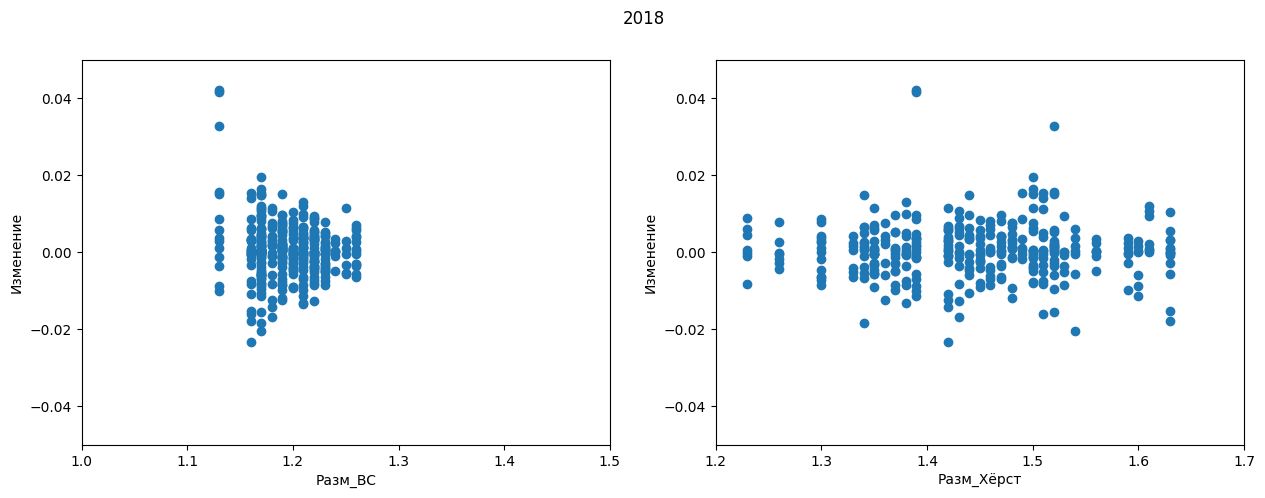

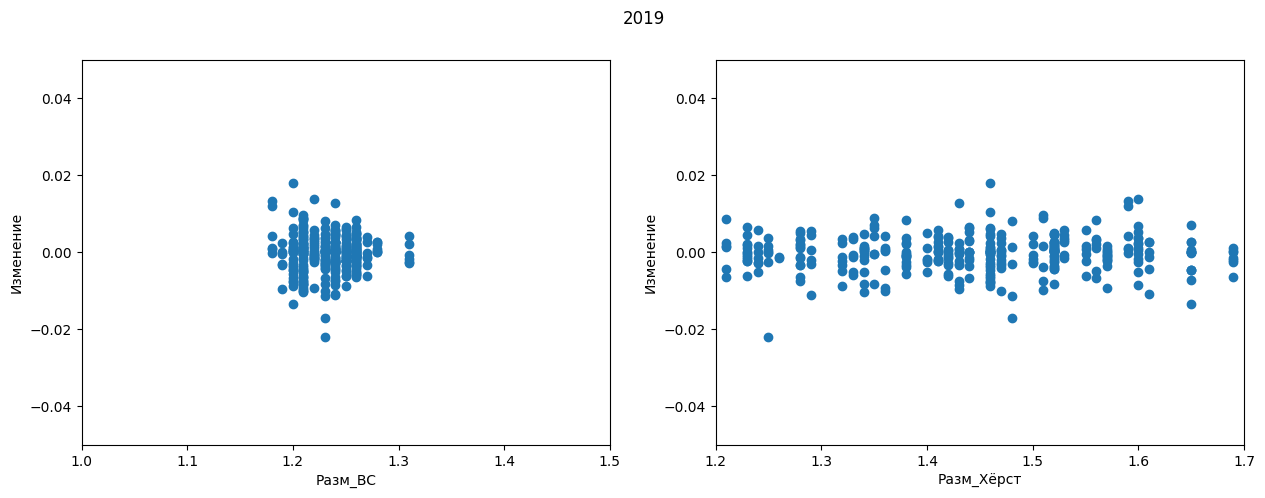

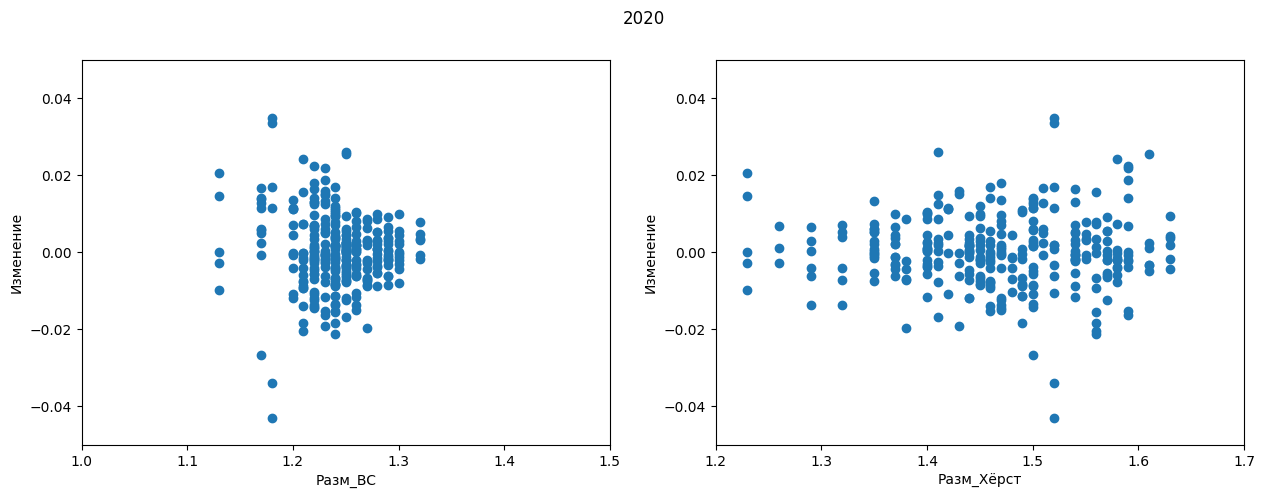

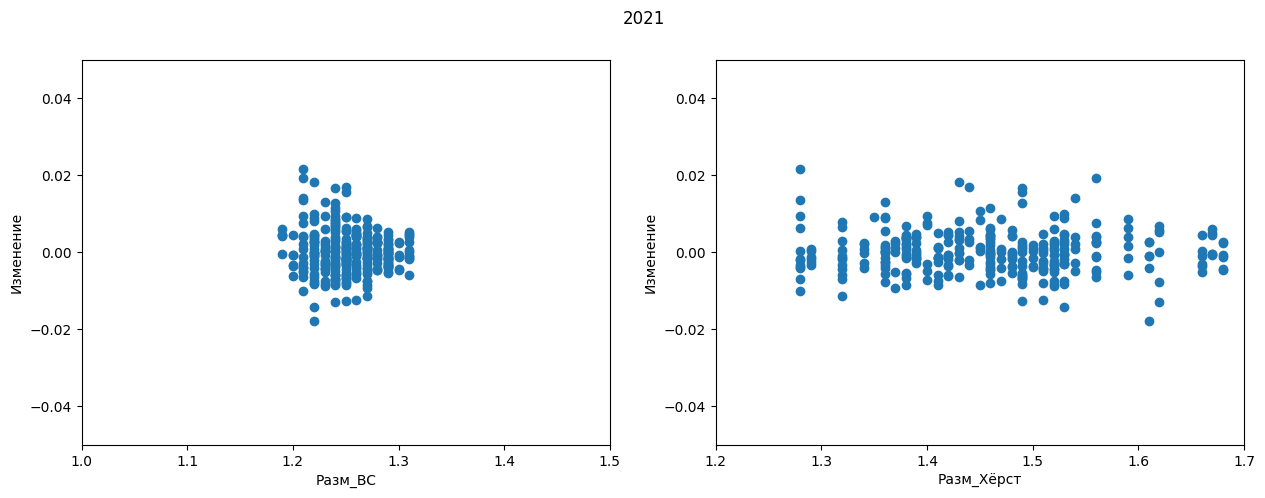

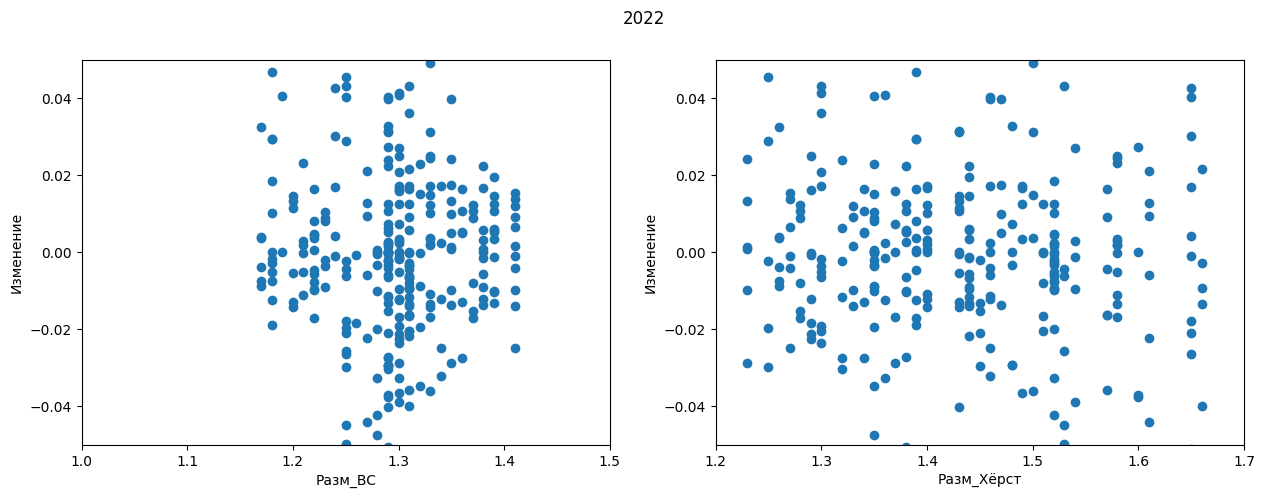

In [8]:
for year in analys['Год'].unique():
    window = analys.loc[(analys['Год'] == year)]
    
    window['Изменение'] = window['Закрытие'].pct_change()
    
    plt.figure(figsize=(15,5))
    
    plt.subplot(121)
    plt.scatter(window['Разм_BC'], window['Изменение'])
    plt.xlabel('Разм_BC')
    plt.ylabel('Изменение')
    plt.ylim([-0.05,0.05])
    plt.xlim([1.0,1.5])
    
    plt.subplot(122)
    plt.scatter(window['Разм_Хёрст'], window['Изменение'])
    plt.xlabel('Разм_Хёрст')
    plt.ylabel('Изменение')
    plt.ylim([-0.05,0.05])
    plt.xlim([1.2,1.7])
    
    plt.suptitle(f'{year}')
    plt.show()

## Оценка корреляции размерностей и Тренда, Размаха

In [9]:
analys = pd.read_excel('data/Результат_Закрытие_RUB.xlsx')
analys['Год'] = analys['Дата'].dt.year

In [10]:
analys = analys[['Закрытие', 'Объем', 'Изменение', 'Разм_Хёрст', 'Разм_BC', 'Тренд', 'Размах', 'Неделя', 'Год']]

In [11]:
analys = analys.groupby(by=['Год', 'Неделя'], as_index=False).agg({'Закрытие': 'mean',\
                                                                   'Изменение': 'mean',\
                                                                   'Объем' : 'max',\
                                                                   'Тренд': 'mean',\
                                                                   'Размах': 'mean',\
                                                                   'Разм_Хёрст': 'mean',\
                                                                   'Разм_BC': 'mean'})

In [12]:
for year in analys['Год'].unique():
    window = analys.loc[analys['Год']==year]
    print(f'Год {year}')
    window = window.drop(columns=['Год'])
    display(window.corr().round(3)\
    .style\
    .background_gradient(cmap='Greens', vmin=0.3, vmax=1)\
    .set_properties(**{'color': 'black'})\
    .map(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None)\
    .map(lambda v: 'border: 3px solid orange;' if (v >= 0.6) or (v <= -0.6) else None)\
    .highlight_max(color='green')\
    .highlight_min(color='lightblue'))

Год 2018


,Неделя,Закрытие,Изменение,Объем,Тренд,Размах,Разм_Хёрст,Разм_BC
Неделя,1.000000,0.921000,0.039000,0.698000,0.081000,0.091000,-0.002000,0.089000
Закрытие,0.921000,1.000000,0.096000,0.529000,0.100000,0.277000,0.072000,-0.130000
Изменение,0.039000,0.096000,1.000000,0.181000,0.918000,0.557000,0.039000,-0.323000
Объем,0.698000,0.529000,0.181000,1.000000,0.172000,0.146000,-0.041000,0.054000
Тренд,0.081000,0.100000,0.918000,0.172000,1.000000,0.346000,0.081000,-0.183000
Размах,0.091000,0.277000,0.557000,0.146000,0.346000,1.000000,0.157000,-0.801000
Разм_Хёрст,-0.002000,0.072000,0.039000,-0.041000,0.081000,0.157000,1.000000,-0.273000
Разм_BC,0.089000,-0.130000,-0.323000,0.054000,-0.183000,-0.801000,-0.273000,1.000000


Год 2019


,Неделя,Закрытие,Изменение,Объем,Тренд,Размах,Разм_Хёрст,Разм_BC
Неделя,1.000000,-0.637000,0.067000,0.098000,0.009000,-0.303000,-0.138000,0.217000
Закрытие,-0.637000,1.000000,-0.022000,-0.196000,-0.020000,0.391000,0.161000,-0.275000
Изменение,0.067000,-0.022000,1.000000,-0.078000,0.895000,-0.069000,0.103000,-0.001000
Объем,0.098000,-0.196000,-0.078000,1.000000,-0.007000,0.200000,-0.057000,-0.061000
Тренд,0.009000,-0.020000,0.895000,-0.007000,1.000000,-0.047000,-0.051000,0.073000
Размах,-0.303000,0.391000,-0.069000,0.200000,-0.047000,1.000000,0.085000,-0.786000
Разм_Хёрст,-0.138000,0.161000,0.103000,-0.057000,-0.051000,0.085000,1.000000,-0.157000
Разм_BC,0.217000,-0.275000,-0.001000,-0.061000,0.073000,-0.786000,-0.157000,1.000000


Год 2020


,Неделя,Закрытие,Изменение,Объем,Тренд,Размах,Разм_Хёрст,Разм_BC
Неделя,1.000000,0.684000,-0.176000,0.375000,-0.116000,-0.158000,0.081000,0.445000
Закрытие,0.684000,1.000000,-0.082000,0.445000,-0.072000,0.370000,0.220000,0.170000
Изменение,-0.176000,-0.082000,1.000000,0.014000,0.913000,0.468000,-0.091000,-0.419000
Объем,0.375000,0.445000,0.014000,1.000000,0.025000,0.004000,0.258000,0.192000
Тренд,-0.116000,-0.072000,0.913000,0.025000,1.000000,0.356000,-0.043000,-0.258000
Размах,-0.158000,0.370000,0.468000,0.004000,0.356000,1.000000,0.087000,-0.663000
Разм_Хёрст,0.081000,0.220000,-0.091000,0.258000,-0.043000,0.087000,1.000000,0.021000
Разм_BC,0.445000,0.170000,-0.419000,0.192000,-0.258000,-0.663000,0.021000,1.000000


Год 2021


,Неделя,Закрытие,Изменение,Объем,Тренд,Размах,Разм_Хёрст,Разм_BC
Неделя,1.000000,-0.490000,0.156000,0.038000,0.076000,-0.013000,-0.191000,-0.032000
Закрытие,-0.490000,1.000000,0.087000,-0.272000,0.066000,0.323000,0.076000,-0.186000
Изменение,0.156000,0.087000,1.000000,-0.189000,0.882000,0.301000,-0.112000,-0.223000
Объем,0.038000,-0.272000,-0.189000,1.000000,-0.083000,-0.290000,0.165000,0.041000
Тренд,0.076000,0.066000,0.882000,-0.083000,1.000000,0.273000,-0.155000,-0.211000
Размах,-0.013000,0.323000,0.301000,-0.290000,0.273000,1.000000,0.061000,-0.847000
Разм_Хёрст,-0.191000,0.076000,-0.112000,0.165000,-0.155000,0.061000,1.000000,-0.089000
Разм_BC,-0.032000,-0.186000,-0.223000,0.041000,-0.211000,-0.847000,-0.089000,1.000000


Год 2022


,Неделя,Закрытие,Изменение,Объем,Тренд,Размах,Разм_Хёрст,Разм_BC
Неделя,1.000000,-0.588000,0.049000,-0.601000,0.257000,-0.370000,-0.080000,0.794000
Закрытие,-0.588000,1.000000,0.166000,0.224000,-0.344000,0.796000,-0.097000,-0.488000
Изменение,0.049000,0.166000,1.000000,0.081000,0.755000,0.168000,-0.021000,-0.141000
Объем,-0.601000,0.224000,0.081000,1.000000,0.130000,-0.149000,-0.036000,-0.661000
Тренд,0.257000,-0.344000,0.755000,0.130000,1.000000,-0.277000,-0.013000,-0.008000
Размах,-0.370000,0.796000,0.168000,-0.149000,-0.277000,1.000000,-0.072000,-0.355000
Разм_Хёрст,-0.080000,-0.097000,-0.021000,-0.036000,-0.013000,-0.072000,1.000000,-0.169000
Разм_BC,0.794000,-0.488000,-0.141000,-0.661000,-0.008000,-0.355000,-0.169000,1.000000


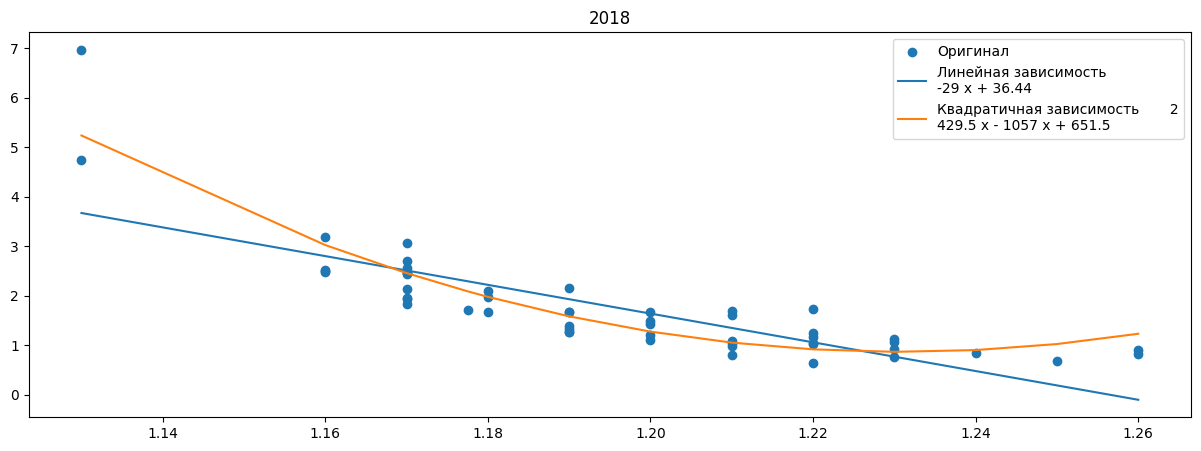

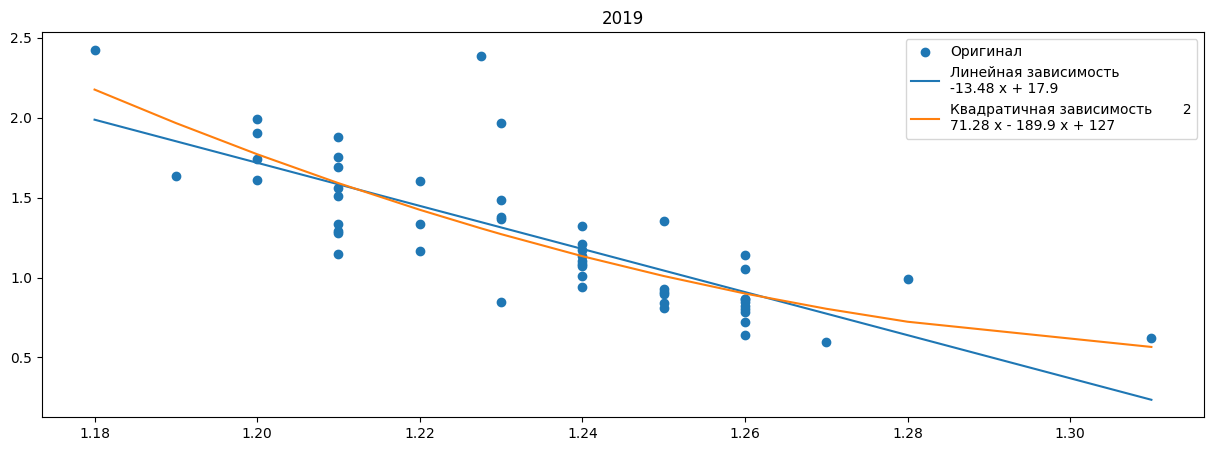

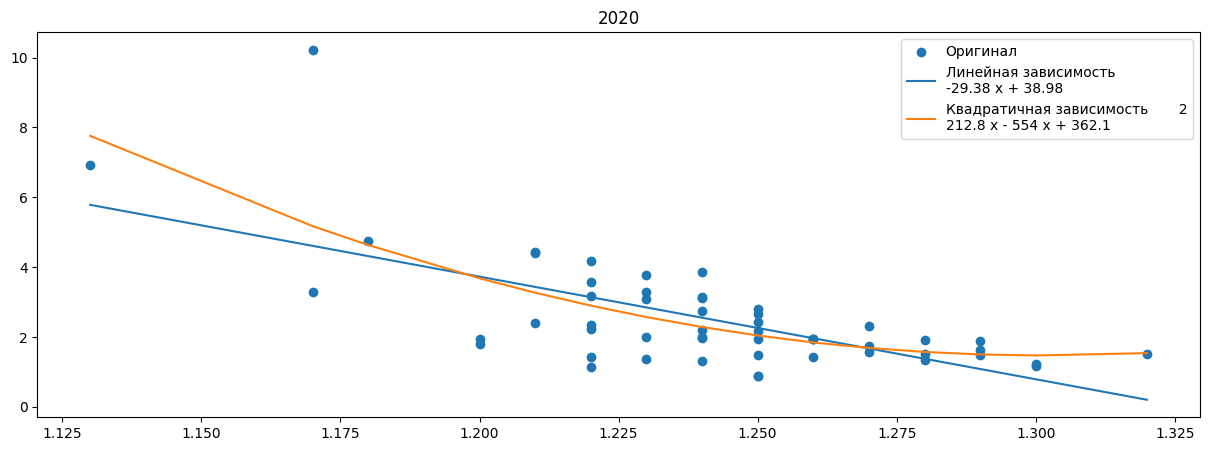

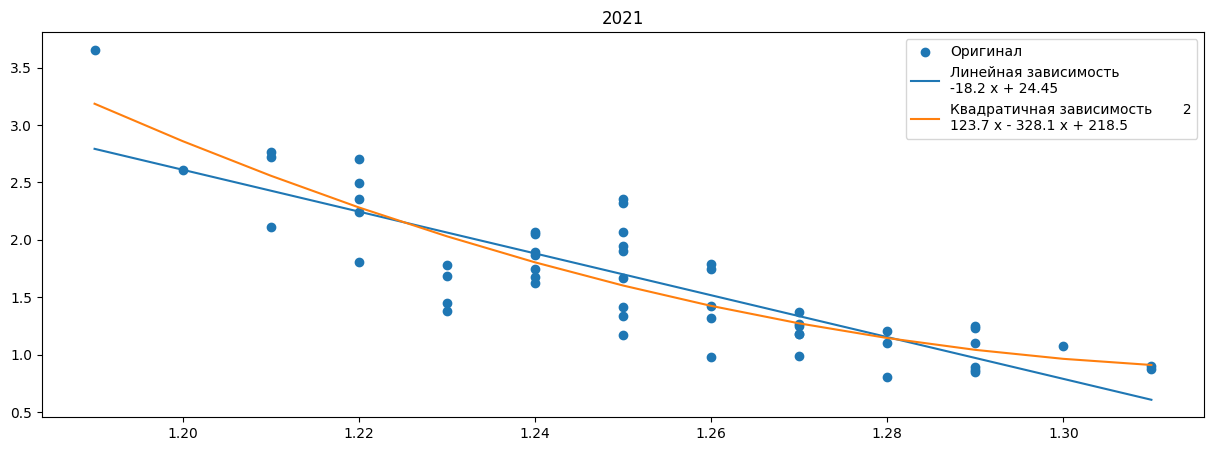

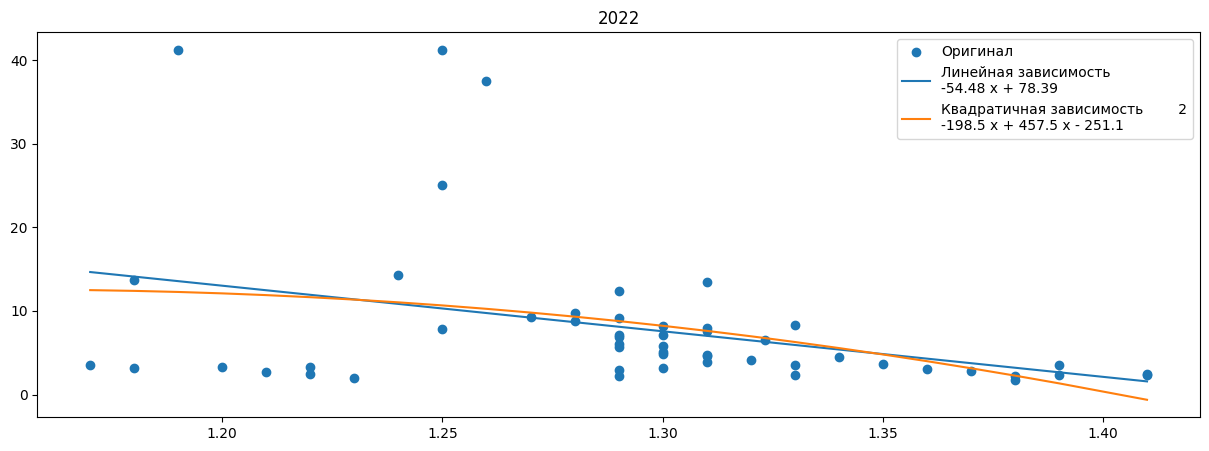

In [13]:
for year in analys['Год'].unique():
    window = analys.loc[analys['Год']==year]
    window = window.sort_values(by=['Разм_BC'])
    
    z = np.polyfit(window['Разм_BC'], window['Размах'], 1)
    p = np.poly1d(z)
    
    z2 = np.polyfit(window['Разм_BC'], window['Размах'], 2)
    p2 = np.poly1d(z2)
    
    plt.figure(figsize=(15,5))
    plt.title(f'{year}')
    
    plt.scatter(window['Разм_BC'], window['Размах'], label='Оригинал')
    plt.legend()
    
    plt.plot(window['Разм_BC'], p(window['Разм_BC']), label=f'Линейная зависимость{p}')
    plt.legend()
    
    plt.plot(window['Разм_BC'], p2(window['Разм_BC']), label=f'Квадратичная зависимость{p2}')
    plt.legend()
    
    plt.show()

## Моделирование размаха

In [14]:
data_finam = pd.read_csv('data/USD_RUB_finam.csv', encoding='cp1251')
data_finam['Дата'] = pd.to_datetime(data_finam['Дата'], format='%Y%m%d')
data_finam = data_finam.drop(columns=['Максимум', 'Минимум', 'Открытие'])

data_finam_18 = pd.read_csv('data/USD_CAD_180101_221231_5m.csv', encoding='cp1251')
data_finam_18['Дата'] = pd.to_datetime(data_finam_18['Дата'].astype(str) + ' ' + data_finam_18['Время'].astype(str))
data_finam_18['Изменение'] = data_finam_18['Закрытие'].pct_change() * 100
data_finam_18['Изменение'] = data_finam_18['Изменение'] + 10
data_finam_18['timestamp'] = pd.to_numeric(data_finam_18['Дата']).astype(float) / 10 ** 18
data_finam_18 = data_finam_18.drop(columns=['Максимум', 'Минимум', 'Открытие'])

In [15]:
analys = data_finam.loc[(data_finam['Дата'].dt.year == 2018) | \
                        (data_finam['Дата'].dt.year == 2019) | \
                        (data_finam['Дата'].dt.year == 2020) | \
                        (data_finam['Дата'].dt.year == 2021) | \
                        (data_finam['Дата'].dt.year == 2022)]

In [16]:
analys['Год'] = analys['Дата'].dt.year
analys['Неделя'] = analys['Дата'].dt.isocalendar().week
analys['День_недели'] = analys['Дата'].dt.weekday

Год 2018


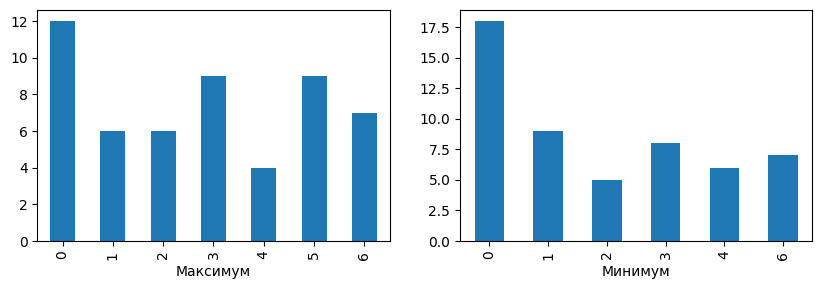

Год 2019


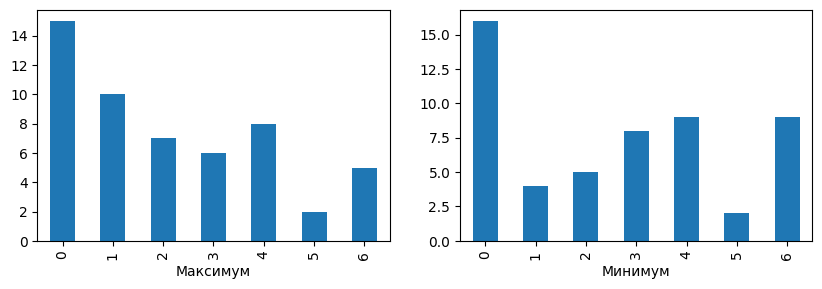

Год 2020


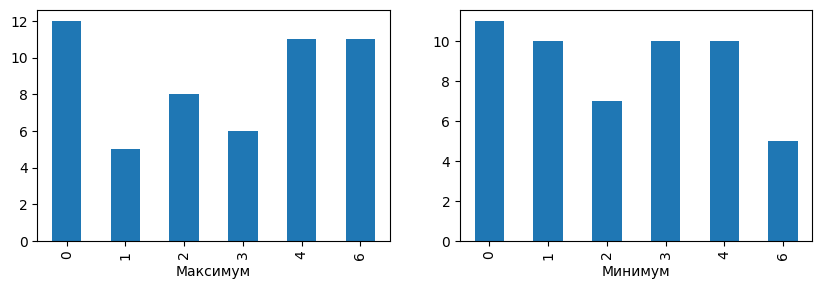

Год 2021


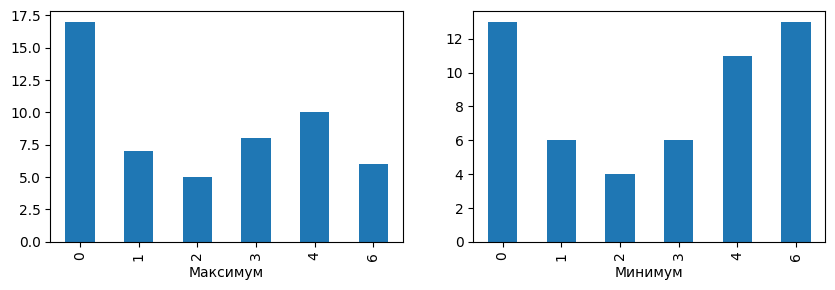

Год 2022


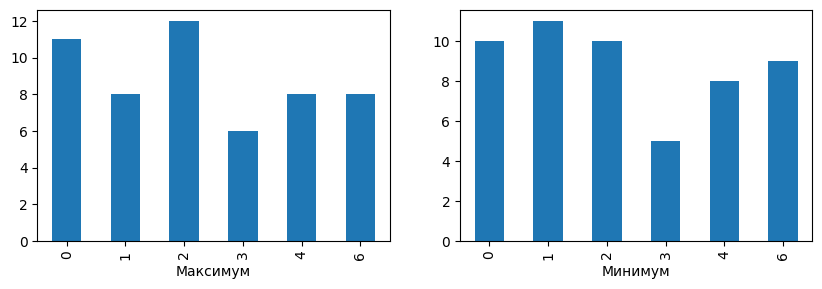

In [17]:
for year in analys['Год'].unique():
    
    analys_week_max = pd.DataFrame(columns=['Максимум'])
    analys_week_min = pd.DataFrame(columns=['Минимум'])
    
    window = analys.loc[analys['Год']==year]
    print(f'Год {year}')
    
    weekly_data = window.resample('W', on='Дата')

    for week, d in weekly_data:
        max_week_df = d.sort_values(by='Закрытие', ascending=False)
        maximum = max_week_df['День_недели'].iloc[0]
        minimum = max_week_df['День_недели'].iloc[-1]
        analys_week_max.loc[len(analys_week_max)] = [maximum]
        analys_week_min.loc[len(analys_week_min)] = [minimum]

    analys_week_max = analys_week_max.groupby(['Максимум'])['Максимум'].count()
    analys_week_min = analys_week_min.groupby(['Минимум'])['Минимум'].count()

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
    
    ax_max = analys_week_max.plot.bar(x='День_недели', ax=axes[0])
    ax_min = analys_week_min.plot.bar(x='День_недели', ax=axes[1])
    
    plt.show()

## Толщина линии / Инструмент

In [20]:
analys = pd.read_excel('data/Результат_Закрытие_RUB.xlsx')
analys['Год'] = analys['Дата'].dt.year

analys = analys[['Закрытие', 'Объем', 'Изменение', 'Разм_Хёрст', 'Разм_BC', 'Тренд', 'Размах', 'Неделя', 'Год', 'Дата']]

analys = analys.groupby(by=['Год', 'Неделя'], as_index=False).agg({'Дата': 'min',\
                                                               'Закрытие': 'mean',\
                                                               'Изменение': 'mean',\
                                                               'Объем' : 'max',\
                                                               'Тренд': 'mean',\
                                                               'Размах': 'mean',\
                                                               'Разм_Хёрст': 'mean',\
                                                               'Разм_BC': 'mean'})

In [21]:
# Уравнение размаха
window = analys.loc[analys['Год']==2018]
window = window.sort_values(by=['Разм_BC'])
    
z = np.polyfit(window['Разм_BC'], window['Размах'], 1)
p = np.poly1d(z)
    
z2 = np.polyfit(window['Разм_BC'], window['Размах'], 2)
p2 = np.poly1d(z2)

In [25]:
def interactive_plot(year, dimension):
    
    # Получаем обработанные данные
    analys = pd.read_excel('data/Результат_Закрытие_RUB.xlsx')
    analys['Год'] = analys['Дата'].dt.year
    
    analys = analys[['Закрытие', 'Объем', 'Изменение', 'Разм_Хёрст', 'Разм_BC', 'Тренд', 'Размах', 'Неделя', 'Год', 'Дата']]
    
    analys = analys.groupby(by=['Год', 'Неделя'], as_index=False).agg({'Дата': 'min',\
                                                                   'Закрытие': 'mean',\
                                                                   'Изменение': 'mean',\
                                                                   'Объем' : 'max',\
                                                                   'Тренд': 'mean',\
                                                                   'Размах': 'mean',\
                                                                   'Разм_Хёрст': 'mean',\
                                                                   'Разм_BC': 'mean'})
    
    # Определяем отображаемое окно
    window = analys.loc[(analys['Год'] == year)]
    window = window.sort_values(by=['Дата'])
    
    # Считаем 5 минутные данные 
    data_finam_18 = pd.read_csv('data/USD_RUB_180101_221231_5m.csv', encoding='cp1251')
    data_finam_18['Дата'] = pd.to_datetime(data_finam_18['Дата'].astype(str) + ' ' + data_finam_18['Время'].astype(str))
    data_finam_18['Изменение'] = data_finam_18['Закрытие'].pct_change() * 100
    data_finam_18['Изменение'] = data_finam_18['Изменение'] + 10
    data_finam_18['timestamp'] = pd.to_numeric(data_finam_18['Дата']).astype(float) / 10 ** 18
    data_finam_18 = data_finam_18.drop(columns=['Максимум', 'Минимум', 'Открытие'])
    
    week_for_plot_5m = data_finam_18.loc[(data_finam_18['Дата'].dt.year == year)]
    
    plt.figure(figsize=(15, 5))
    
    # Строим 5 минутный график
    plt.plot(week_for_plot_5m['Дата'], week_for_plot_5m['Закрытие'], color='orange')
        
    # Строим график по неделям
    for i in range(2, len(window)+1):
        week_for_plot = window.iloc[i-2:i]

        if week_for_plot['Разм_BC'].iloc[0] > dimension:
            plt.plot(week_for_plot['Дата'], week_for_plot['Закрытие'], color='r', linewidth=2)
        else:
            plt.plot(week_for_plot['Дата'], week_for_plot['Закрытие'], color='b', linewidth=2)
            
        # Строим размах    
        scope = p2(week_for_plot['Разм_BC'].iloc[0])
        plt.plot(week_for_plot['Дата'], week_for_plot['Закрытие']+scope, label='Верхняя граница', color='g')
        plt.plot(week_for_plot['Дата'], week_for_plot['Закрытие']-scope, label='Нижняя граница', color='g')
               
    plt.xlabel('Год')
    plt.ylabel('Закрытие')
    plt.title('График изменения курса')
    plt.grid(True)
    plt.show()

In [26]:
interact(interactive_plot, year=(2018, 2022, 1), dimension=(1, 2, 0.01))

interactive(children=(IntSlider(value=2020, description='year', max=2022, min=2018), FloatSlider(value=1.0, de…

<function __main__.interactive_plot(year, dimension)>